In [1]:

#!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('framingham_heart_disease.csv')

Informações:

male: 1 -> homem, 0 -> mulher (variável categórica)

age: idade (variável contínua)

educação: nível educacional (variável categórica)

currentSmoker: 1 -> fumante, 0 -> não fumante (variável categórica)

cigsPerDay: quantidade de cigarros por dia (variável contínua)

BPMeds: 1 -> paciente toma medicamente para pressão, 0- > não toma medicamento (variável categórica)

prevalentStroke: 1 -> paciente teve derrame, 0 -> não teve (variável categórica)

prevalentHyp: 1 -> hipertensor, 0 -> não hipertenso (variável categórica)

diabetes: 1 -> tem diabetes, 0 -> não tem (variável categórica)

totChol: colesterol total (variável contínua)

sysBP: pressão sanguínea sistólica (variável contínua)

diaBP: pressão sanguínea diastólica (variável contínua)

BMI: indice de massa corporal (variável contínua)

heartRate: batimento cardíaco (variável contínua)

glucose: glicose (variável contínua)

TenYearCHD: 1 -> terá problema, 0 -> não terá (variável categórica)



In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
'''Excluindo linhas com dados ausentes'''

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [5]:
"""Excluindo a coluna education """
dataset = df.drop('education',axis=1)

In [6]:
normalizador = MinMaxScaler(feature_range=(0,1)) 

In [7]:
colunas = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [8]:
dataset[colunas] = normalizador.fit_transform(dataset[colunas])

In [9]:
contagem = dataset['TenYearCHD'].value_counts()

print('Classe 0 = ',contagem[0])
print('Classe 1 = ',contagem[1])


Classe 0 =  3099
Classe 1 =  557


In [10]:
dataset_1 = dataset[dataset['TenYearCHD']==1]
dataset_0 = dataset[dataset['TenYearCHD']==0]

dataset_0_novo = dataset_0.sample(n=contagem[1],random_state=42)

In [11]:
dados = pd.concat([dataset_0_novo,dataset_1])


In [12]:
contagem = dados['TenYearCHD'].value_counts()
print('Classe 0 = ',contagem[0])
print('Classe 1 = ',contagem[1])

Classe 0 =  557
Classe 1 =  557


In [13]:
dados = pd.concat([dataset_0_novo,dataset_1])
dados

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
994,0,0.368421,0,0.000000,0.0,0,0,0,0.322382,0.182033,0.296296,0.140814,0.333333,0.135593,0
4038,0,0.184211,0,0.000000,0.0,0,0,0,0.139630,0.092199,0.148148,0.124576,0.262626,0.081921,0
2477,1,0.184211,1,0.285714,0.0,0,0,0,0.244353,0.184397,0.322751,0.256180,0.363636,0.093220,0
2222,0,0.868421,1,0.014286,0.0,0,1,0,0.429158,0.385343,0.497354,0.176927,0.363636,0.115819,0
1623,1,0.368421,1,0.071429,0.0,0,0,0,0.221766,0.196217,0.423280,0.224673,0.282828,0.132768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1,0.473684,0,0.000000,0.0,0,0,0,0.301848,0.167849,0.275132,0.152933,0.363636,0.090395,1
4223,1,0.631579,0,0.000000,1.0,0,1,0,0.357290,0.309693,0.529101,0.148812,0.464646,0.098870,1
4226,1,0.684211,0,0.000000,0.0,0,0,0,0.246407,0.198582,0.380952,0.254726,0.232323,0.101695,1
4232,1,0.947368,0,0.000000,0.0,0,1,0,0.129363,0.399527,0.518519,0.184198,0.161616,0.110169,1


In [14]:
target=dados['TenYearCHD'].values
pca= PCA(n_components=6)
dados_pca=pca.fit_transform(dados)

In [15]:
# Obter os nomes das variáveis originais (se estiverem disponíveis)
variaveis = dados.columns

# Obter os pesos (coeficientes) dos componentes principais
pesos = pca.components_

# # Criar um DataFrame para facilitar a análise
df_pesos = pd.DataFrame(pesos.T, columns=[f'CP{i+1}' for i in range(pca.n_components_)], index=variaveis)
df_pesos.sort_values(by='CP1', inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


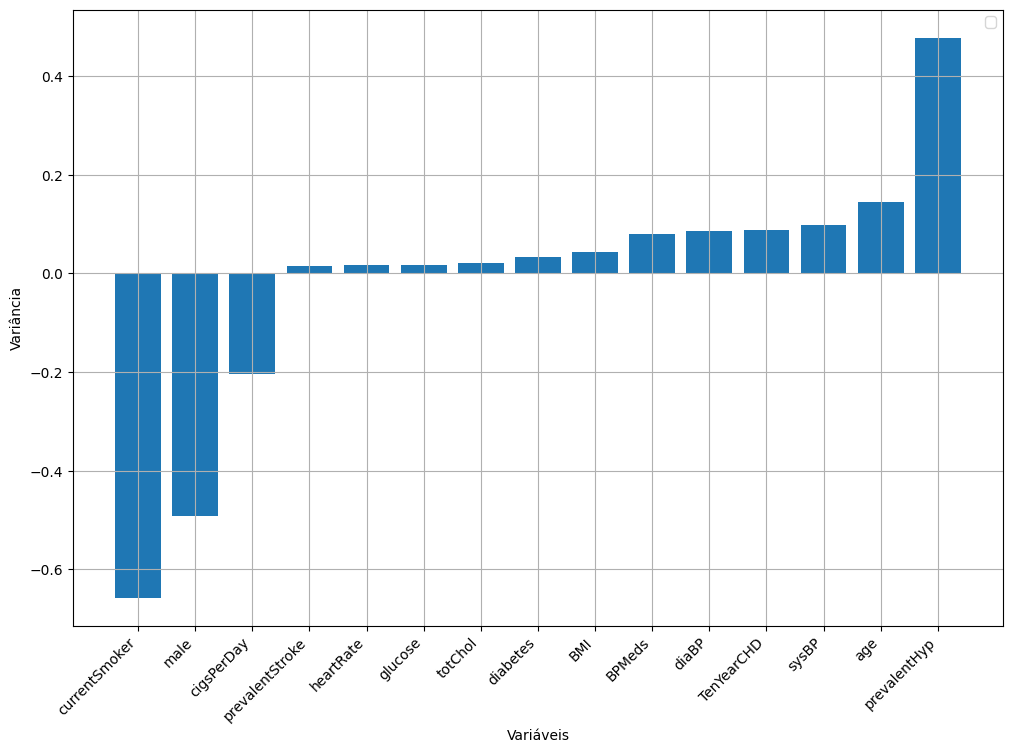

In [16]:
plt.figure(figsize=(12, 8))
plt.bar(df_pesos.index, df_pesos.CP1)

plt.xlabel('Variáveis')
plt.ylabel('Variância')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade

plt.grid(True)
plt.show()

In [17]:
df_regressao = pd.DataFrame({'CP': dados_pca[:, 0], 'target': target})

In [18]:
df_regressao.sort_values(by='CP', inplace=True)

df_regressao=df_regressao[(df_regressao['CP']>=-1) & (df_regressao['CP']<=1) ].copy()
df_regressao.sort_values(by='CP', inplace=True)

In [19]:
# Criar e treinar o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(df_regressao[['CP']], df_regressao['target'])

LogisticRegression()

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


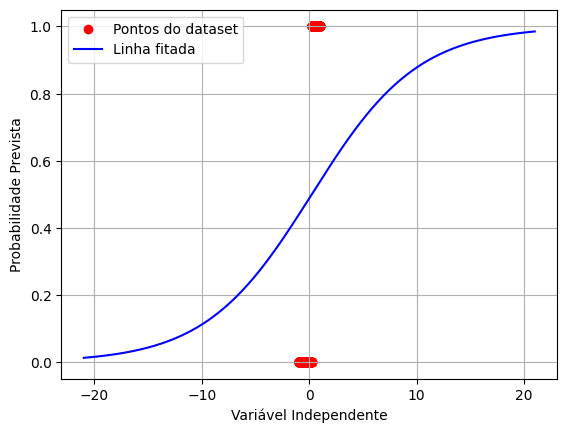

In [20]:
# Criar um intervalo de valores para a variável independente
X_observado=df_regressao['CP'].values.reshape(-1, 1)
X_range = np.linspace(df_regressao['CP'].min()-20, df_regressao['CP'].max()+20, 400)
X_range = pd.DataFrame(X_range, columns=['Componente principal 1'])
# Obter as probabilidades previstas para o intervalo de valores
y_proba = modelo.predict_proba(X_range.values.reshape(-1, 1))[:, 1]
_
# Plotar o gráfico
plt.scatter(X_observado, modelo.predict(X_observado), color='red', label='Pontos do dataset')
plt.plot(X_range, y_proba, color='blue', label='Linha fitada')
plt.xlabel('Variável Independente')
plt.ylabel('Probabilidade Prevista')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
modelo.coef_[0] 

array([0.20158047])